<a href="https://colab.research.google.com/github/nikbizkit/MMO/blob/main/LR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа
## Обработка признаков (часть 1).
### Выполнил: Попов М.А. ИУ5-24М
### Задание:
#### Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
#### Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
#### 1 Устранение пропусков в данных;
#### 2 Кодирование категориальных признаков;
#### 3 Нормализацию числовых признаков.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('cpu.csv')
data.head()

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,NaN,108822,NaN,3330,NaN,280.0,388.65,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,7299.99,88338,12.10,2635,0.36,280.0,315.49,64,2021,SP3,Server
2,AMD EPYC 7J13,NaN,86006,NaN,2387,NaN,NaN,NaN,64,2021,unknown,Server
3,AMD EPYC 7713,7060.00,85861,12.16,2727,0.39,225.0,381.6,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,6807.98,83971,12.33,2626,0.39,280.0,299.9,64,2020,sWRX8,Desktop


In [3]:
data.dtypes

cpuName         object
price          float64
cpuMark          int64
cpuValue       float64
threadMark       int64
threadValue    float64
TDP            float64
powerPerf       object
cores            int64
testDate         int64
socket          object
category        object
dtype: object

# Устранение пропусков в данных

In [4]:
data.isnull().sum()

cpuName           0
price          1858
cpuMark           0
cpuValue       1858
threadMark        0
threadValue    1858
TDP             685
powerPerf       685
cores             0
testDate          0
socket            0
category          0
dtype: int64

In [5]:
data = data.dropna(axis=0, how='any')
data.isnull().sum()

cpuName        0
price          0
cpuMark        0
cpuValue       0
threadMark     0
threadValue    0
TDP            0
powerPerf      0
cores          0
testDate       0
socket         0
category       0
dtype: int64

#Кодирование категориальных признаков

In [6]:
date = LabelEncoder()
date_transform = date.fit_transform(data['cpuName'])

In [7]:
data['cpuName'].unique()

array(['AMD EPYC 7763', 'AMD EPYC 7713',
       'AMD Ryzen Threadripper PRO 3995WX', ...,
       'Intel Atom D410 @ 1.66GHz', 'AMD Athlon XP 1700+',
       'Intel Atom E3815 @ 1.46GHz'], dtype=object)

In [8]:
np.unique(date_transform)

array([   0,    1,    2, ..., 1935, 1936, 1937])

# Нормализацию числовых признаков

In [25]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

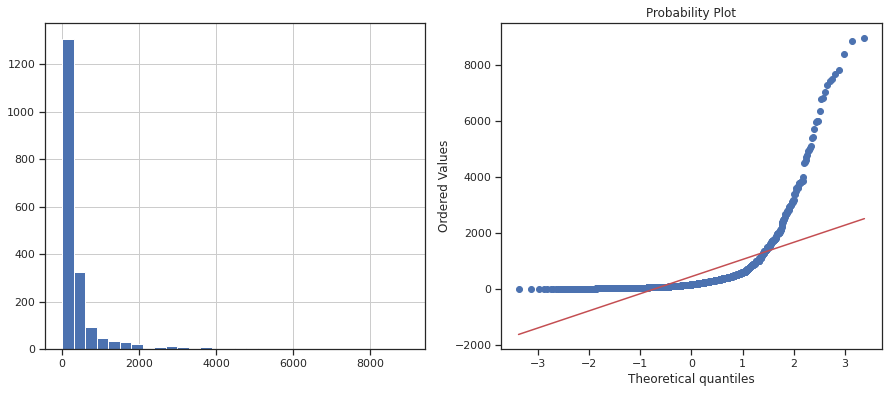

In [26]:
diagnostic_plots(data, 'price')

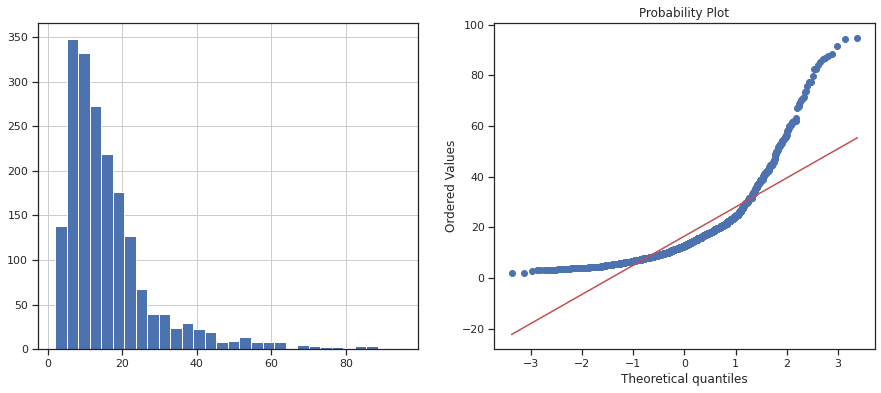

In [27]:
data['price_sqr'] = data['price']**(1/2)
diagnostic_plots(data, 'price_sqr')

Оптимальное значение λ = -0.08510004004572988


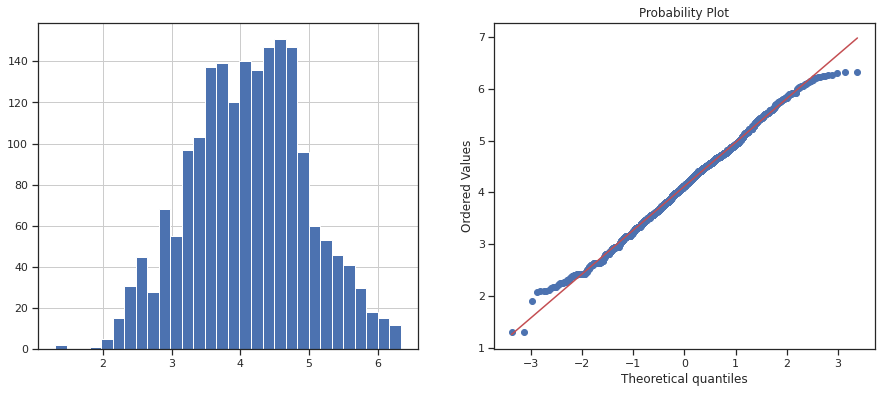

In [28]:
data['price_boxcox'], param = stats.boxcox(data['price'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'price_boxcox')